In [ ]:
# Cargar el archivo CS
pokes = pd.read_csv('../Datasets/Pokemon.csv')

# Mostrar las primeras filas
pokes.head(20)


,Num,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False
5,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,3,False
6,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
7,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,2,False
8,9,Blastoise,Water,NaN,530,79,83,100,85,105,78,3,False
9,10,Caterpie,Bug,NaN,195,45,30,35,20,20,45,1,False


In [ ]:
# Seleccionar columnas de estadísticas
stats_columns = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

# Supongamos que las columnas de estadísticas están de la columna 5 a la 10
# stats_data = df.iloc[:5, 5:11]  # filas del 0 al 4 y columnas 5 a 10


# ------------- Obtener estadísticas base y sus nombres

# selected_pokemon = pokes.head(5)
selected_pokemon = pokes.sample(5, random_state=42)  # puedes quitar random_state para que sea siempre distinto
stats_data = selected_pokemon[stats_columns]    

# stats_data
print(selected_pokemon['Name'])
print(stats_data)

76         Ponyta
18        Rattata
82     Farfetch'd
81       Magneton
143      Articuno
Name: Name, dtype: object
     HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
76   50      85       55       65       65     90
18   30      56       35       25       35     72
82   52      65       55       58       62     60
81   50      60       95      120       70     70
143  90      85      100       95      125     85


In [ ]:

# Pedir al usuario que introduzca los números
entrada = input("Introduce los números de Pokédex separados por comas (ej: 6,25,94): ")

# Convertir la entrada a una lista de enteros
try:
    numeros = list(map(int, entrada.split(',')))
except ValueError:
    print("Error: debes ingresar solo números separados por comas.")
    exit()

# Filtrar los Pokémon por esos números
selected_pokemon = pokes[pokes['Num'].isin(numeros)]

# Validar si se encontraron resultados
if selected_pokemon.empty:
    print("No se encontraron Pokémon con esos números.")
    exit()

stats_columns = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
stats_data = selected_pokemon[stats_columns]
names = selected_pokemon['Name'].values

# stats_data
print(selected_pokemon['Name'])
print(stats_data)

1        Ivysaur
3     Charmander
4     Charmeleon
5      Charizard
75         Golem
Name: Name, dtype: object
    HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
1   60      62       63       80       80     60
3   39      52       43       60       50     65
4   58      64       58       80       65     80
5   78      84       78      109       85    100
75  80     120      130       55       65     45


In [ ]:
# Transponer para facilitar la visualización
stats_data_t = stats_data.T
stats_data_t.columns = selected_pokemon['Name']
stats_data_t


Name,Ivysaur,Charmander,Charmeleon,Charizard,Golem
HP,60,39,58,78,80
Attack,62,52,64,84,120
Defense,63,43,58,78,130
Sp. Atk,80,60,80,109,55
Sp. Def,80,50,65,85,65
Speed,60,65,80,100,45


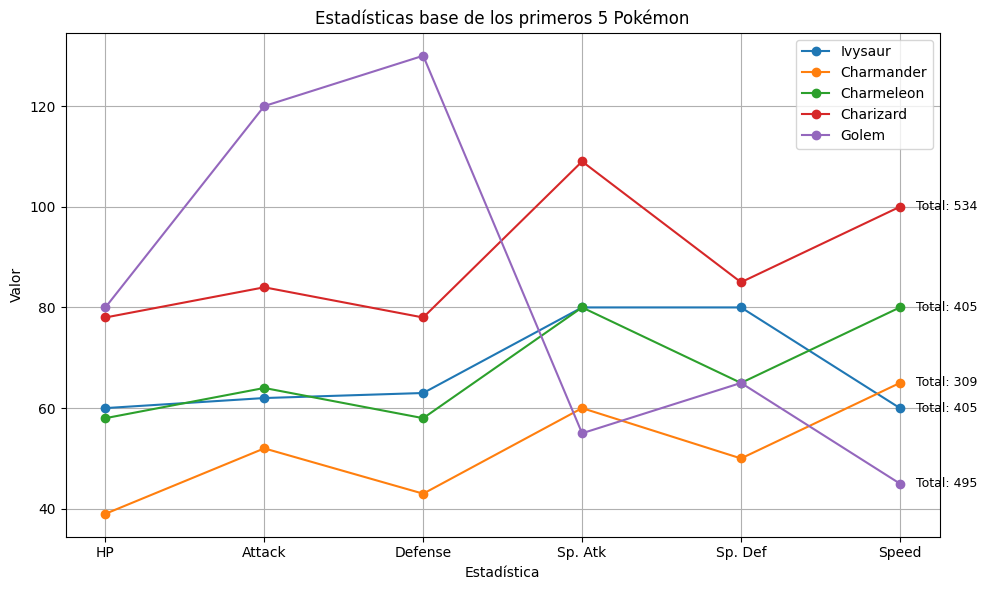

In [ ]:
import matplotlib.pyplot as plt

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
for name in stats_data_t.columns:
    values = stats_data_t[name].values
    plt.plot(stats_data_t.index, stats_data_t[name], marker='o', label=name)
    
    # Agregar el texto al final de la línea (último punto)
    total = values.sum()
    x = len(stats_data_t.index) - 1  # Última posición del eje X
    y = values[-1]                   # Valor Y en el último punto
    plt.text(x + 0.1, y, f'Total: {total}', fontsize=9, va='center')

plt.title('Estadísticas base de los primeros 5 Pokémon')
plt.xlabel('Estadística')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
